<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/01.%20Setup%20And%20Authentication.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/01.%20Setup%20And%20Authentication.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<table align="left">
  <tr>
    <td>Author(s)</td>
    <td><a href="https://github.com/chuongmep" id="author-link">Chuong Ho</a></td>
    <!-- <td><a href="<your repo>" id="github-link">YourName</a></td> -->
  </tr>
</table>

## Setup Library
### Python Required Libraries
 - pandas
 - requests
### Python Version Required
 - Python >= 3.9

### Getting Started
Before we get started, we need to install the `aps-toolkit` package. This package contains tools for working with the APS (Autodesk Platform Services).

`%pip install aps-toolkit --upgrade`

This command is using pip, the Python package installer, to install or upgrade the `aps-toolkit` package. The `%` at the start is a Jupyter Notebook specific syntax called a magic command. When used at the start of a line, it tells the notebook to treat the rest of the line as a command to be run in the system shell.

The `install` argument tells pip what operation to perform. In this case, it's being asked to install a package.

`aps-toolkit` is the name of the package that's being installed. This package contains tools for working with the APS (Advanced Photon Source) at Argonne National Laboratory.

The `--upgrade` flag tells pip to upgrade the package to the latest version if it's already installed. If the package isn't already installed, pip will just install the latest version.

In [13]:
%pip install aps-toolkit --upgrade

## Authentication
- Get 2-legged token: https://aps.autodesk.com/en/docs/oauth/v2/tutorials/get-2-legged-token
- Get 3-legged token: https://aps.autodesk.com/en/docs/oauth/v2/tutorials/get-3-legged-token/

What you need to do is:

1. Register an app on the [Autodesk Developer Network](https://aps.autodesk.com/en/docs/oauth/v2/tutorials/create-app/)
2. Get the `client id` and `client secret`

3. Set Client ID and Client Secret in the environment variable  

- Windows: 

What you need to do is:

1. Register an app on the [Autodesk Developer Network](https://aps.autodesk.com/en/docs/oauth/v2/tutorials/create-app/)
2. Get the `client id` and `client secret`

3. Set Client ID and Client Secret in the environment variable  

- Windows: 

What you need to do is:

1. Register an app on the [Autodesk Developer Network](https://aps.autodesk.com/en/docs/oauth/v2/tutorials/create-app/)
2. Get the `client id` and `client secret`

3. Set Client ID and Client Secret in the environment variable  

- Windows: 

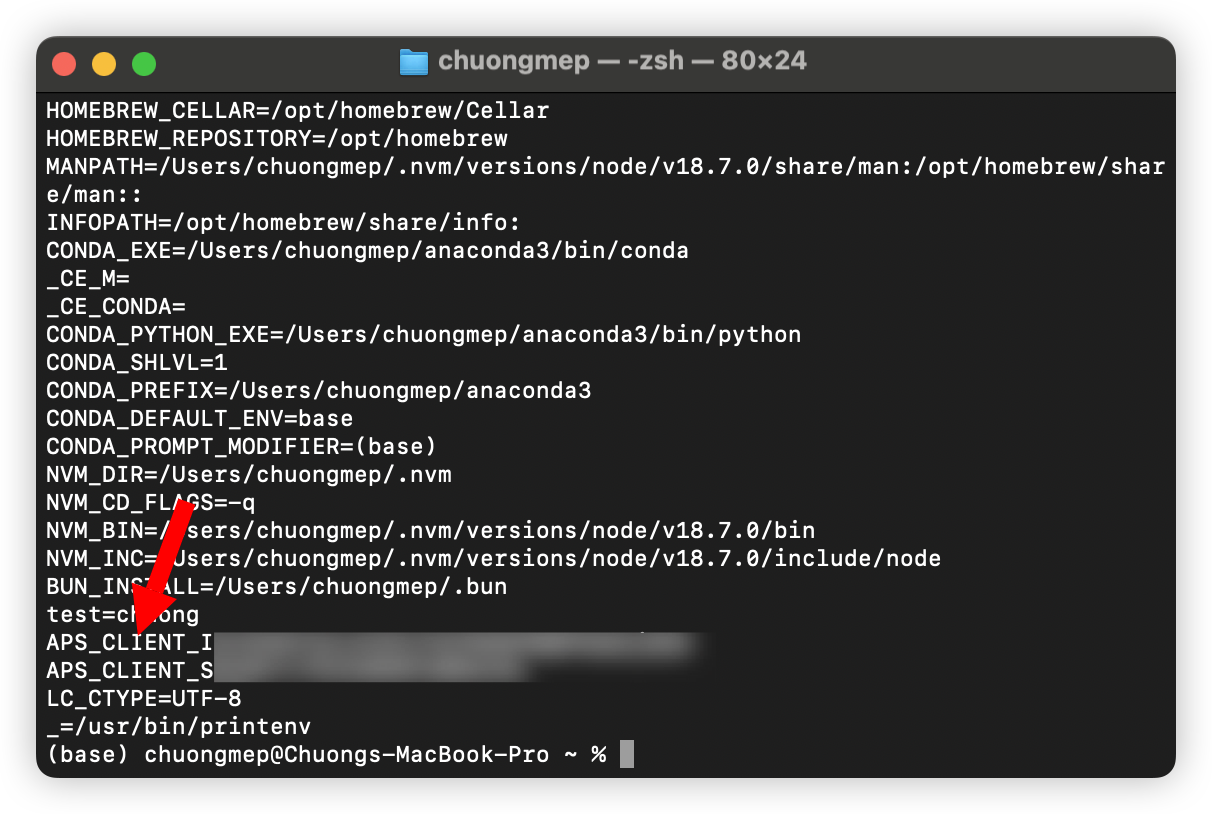

You can following this code to set the environment variable:
```python
import os 
os.environ['APS_CLIENT_ID'] = '<Your Client Id>'
os.environ ['APS_CLIENT_SECRET'] = '<Your Client Secret>'
```

- Macos

```bash
echo "export APS_CLIENT_ID=<Your Client Id>" >> ~/.zshrc
echo "export APS_CLIENT_SECRET=<Your Client Secret> >> ~/.zshrc
```

Recheck the environment variable make sure it's set correctly:
```bash
cat ~/.zshrc
```
In the case you need recheck all environment variable:
```bash
printenv
```
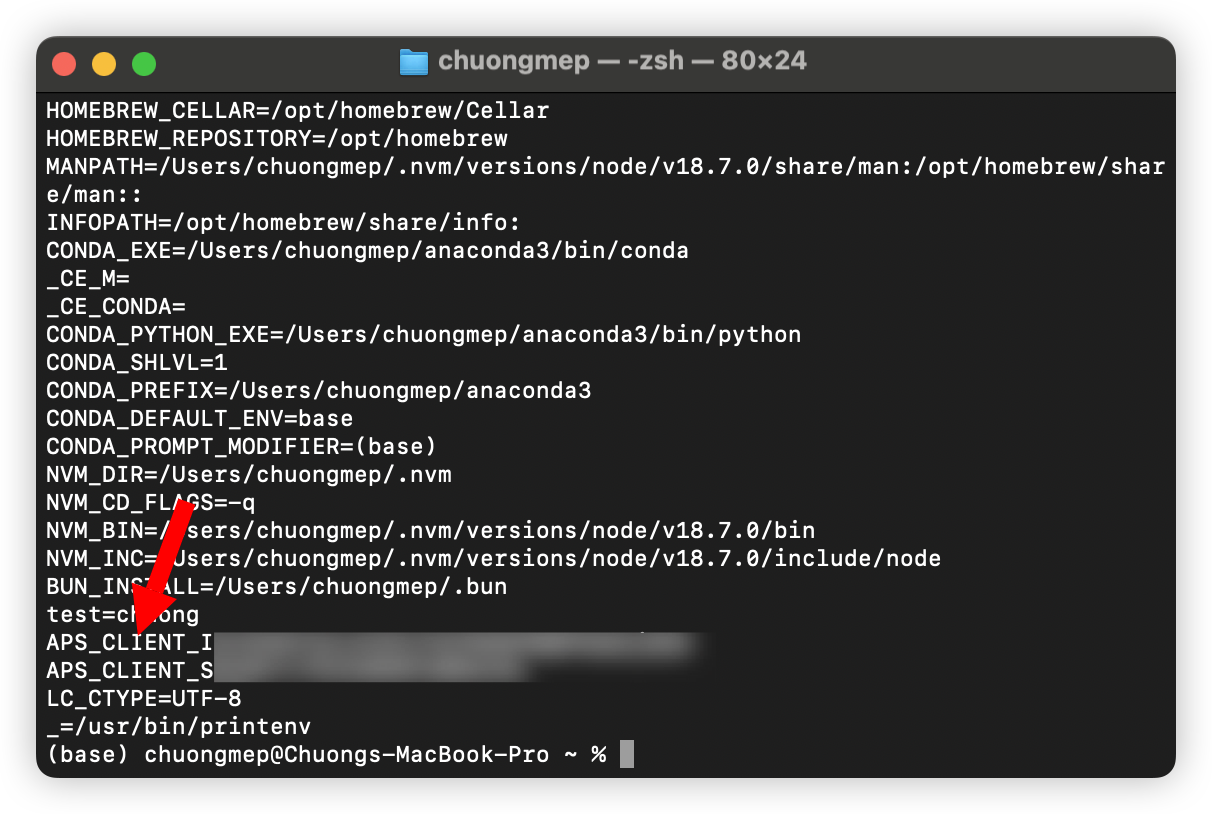


### Get 2-legged token


The "Get 2-legged token" section likely refers to the process of obtaining a 2-legged OAuth token from Autodesk Forge. Here's a brief description:

Autodesk Forge uses OAuth 2.0 for authorization. A 2-legged OAuth scenario is one in which your application acts as a client to Autodesk services, with no user intervention. This is typically used to access services that are not user-specific, such as the Data Management API for accessing common data, or the Model Derivative API for translating design files.

To get a 2-legged token, you'll need to make a POST request to the Autodesk Forge authentication API, providing your client ID and client secret. The response will include an access token that you can use to authenticate your requests to Autodesk Forge services.

Here's a Python example of how to get a 2-legged token:



In [1]:
from aps_toolkit import Auth

## Authentication Normally

In [5]:
import os

client_id = os.environ.get('APS_CLIENT_ID')
client_secret = os.environ.get('APS_CLIENT_SECRET')
auth = Auth(client_id, client_secret)


In [3]:
token = auth.auth2leg()
access_token = token.access_token
# if not empty, then the token is valid
if access_token:
    print('Token is valid')
else:
    print('Token is invalid')

Token is valid


In [4]:
token.expires_in

3599

In [5]:
token.token_type

'Bearer'

## Authentication 3-legged
A 3-legged OAuth scenario is one in which your application acts as a client to Autodesk services on behalf of a user. This is typically used to access services that are user-specific, such as the Design Automation API for running scripts on design files, or the BIM 360 API for accessing project data.

In [14]:
redirect_uri = "http://localhost:8080/api/auth/callback"
scopes = 'data:read viewables:read'
token = auth.auth3leg(redirect_uri, scopes)

127.0.0.1 - - [01/May/2024 19:33:40] "GET /api/auth/callback?code=I0UUJgdxMeSnpKYouDLtqVHpWxlgbMZ9b71A3WaY HTTP/1.1" 200 -


In [15]:
# this is the old token
# token.refresh_token

'4PMFchPxHlKm9lQkxeXG9eq7W5IuX3afSGWJZamsKh'

## Authentication 3-legged PKCE
This option is recommended for scenarios where your application is running natively on a desktop or a mobile device, in other words, for scenarios where you cannot protect your app's credentials. This application type uses Proof Key for Code Exchange (PKCE) for increased security.

Tutorials : 
- https://aps.autodesk.com/blog/new-application-types
- https://aps.autodesk.com/en/docs/oauth/v2/developers_guide/scopes

In [1]:
from aps_toolkit import Auth
import os

redirect_uri = "http://localhost:8080/api/auth/callback"
scopes = 'data:read viewables:read'
client_id = os.environ['APS_CLIENT_PKCE_ID']
token = Auth().auth3legPkce(client_id, redirect_uri, scopes)

127.0.0.1 - - [06/May/2024 14:53:11] "GET /api/auth/callback?code=FgV78SdIIoDOWJ_Z8Is7_O1lYBTn76IvaasTy_wo HTTP/1.1" 200 -


### Refresh Token With 3-legged
Refresh token allows you to get a new access token without having to re-authenticate the user. This is useful for long-running applications that need to access Autodesk services on behalf of a user over an extended period of time.
Follow the token refresh process below: 

https://aps.autodesk.com/en/docs/oauth/v2/tutorials/get-3-legged-token/

In [ ]:
new_token = auth.refresh_new_token(token.refresh_token)
# new_token.refresh_token

## Get User Information
To get the user information logged in, you need to make sure that you used the 3-legged token to get the user information.

In [ ]:
from aps_toolkit import Auth

redirect_uri = "http://localhost:8080/api/auth/callback"
scopes = 'data:read viewables:read'
token = auth.auth3leg(redirect_uri, scopes)
user_infor = auth.get_user_info()
print("User:", user_infor["name"])
print("Job Title:", user_infor["job_title"])

## Google Colab

In [ ]:
from google.colab import userdata

client_id = userdata.get('APS_CLIENT_ID')
client_secret = userdata.get('APS_CLIENT_SECRET')
auth = Auth(client_id, client_secret)
token = auth.auth2leg()

Congratulations! You've successfully obtained a 2-legged token from Autodesk Forge. You can now use this token to authenticate requests to Autodesk Forge services, such as the Data Management API or the Model Derivative API.

In [1]:
from aps_toolkit import AuthGoogleColab

auth = AuthGoogleColab()

In [2]:
# 2leg
token = auth.auth2leg()

In [ ]:
# 3leg  
redirect_uri = "http://localhost:8080/api/auth/callback"
scopes = 'data:read viewables:read'
token = auth.auth3leg(redirect_uri, scopes)

In [ ]:
# 3leg PKCE
client_id = userdata.get('APS_CLIENT_PKCE_ID')
redirect_uri = "http://localhost:8080/api/auth/callback"
scopes = 'data:read viewables:read'
token = auth.auth3legPkce(client_id, redirect_uri, scopes)
